In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
Ab_data = pd.read_csv('Absenteeism_at_work.csv',sep=';')
Ab_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [16]:
Ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

### To check if the dataset contains missing values

In [17]:
Ab_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

### DATA PREPARATION

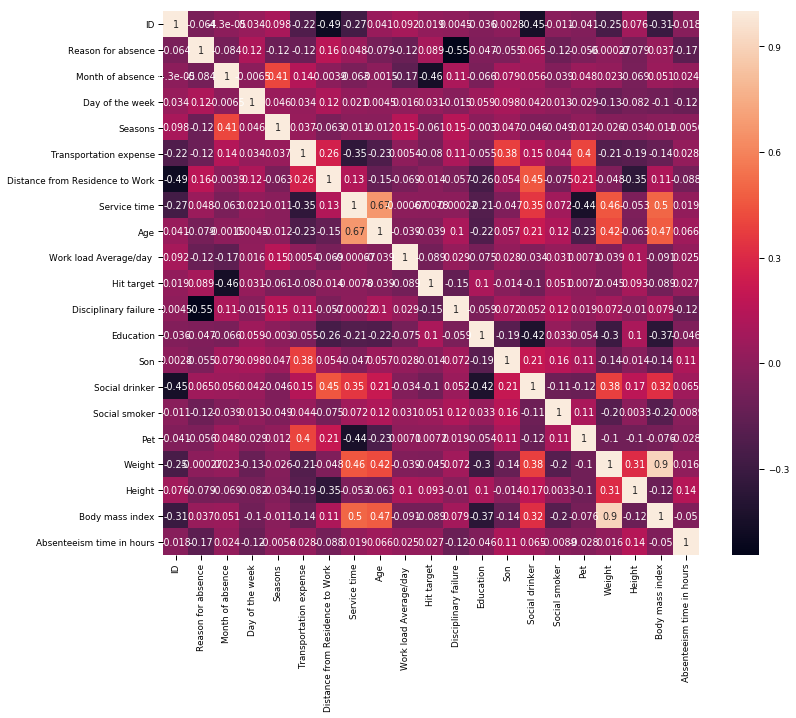

In [18]:
plt.figure(figsize=(12,10))
sns.set_context(context='paper')
sns.heatmap(Ab_data.corr(),annot=True)
#Checking if there is correlation between the features and the Absenteeism in hours column

In [10]:
Ab_data.drop(['Month of absence','Day of the week','Seasons','Weight','Height','Hit target'], 1, inplace = True)

# Yazan has done data visualization already but just looking at the data using sns.



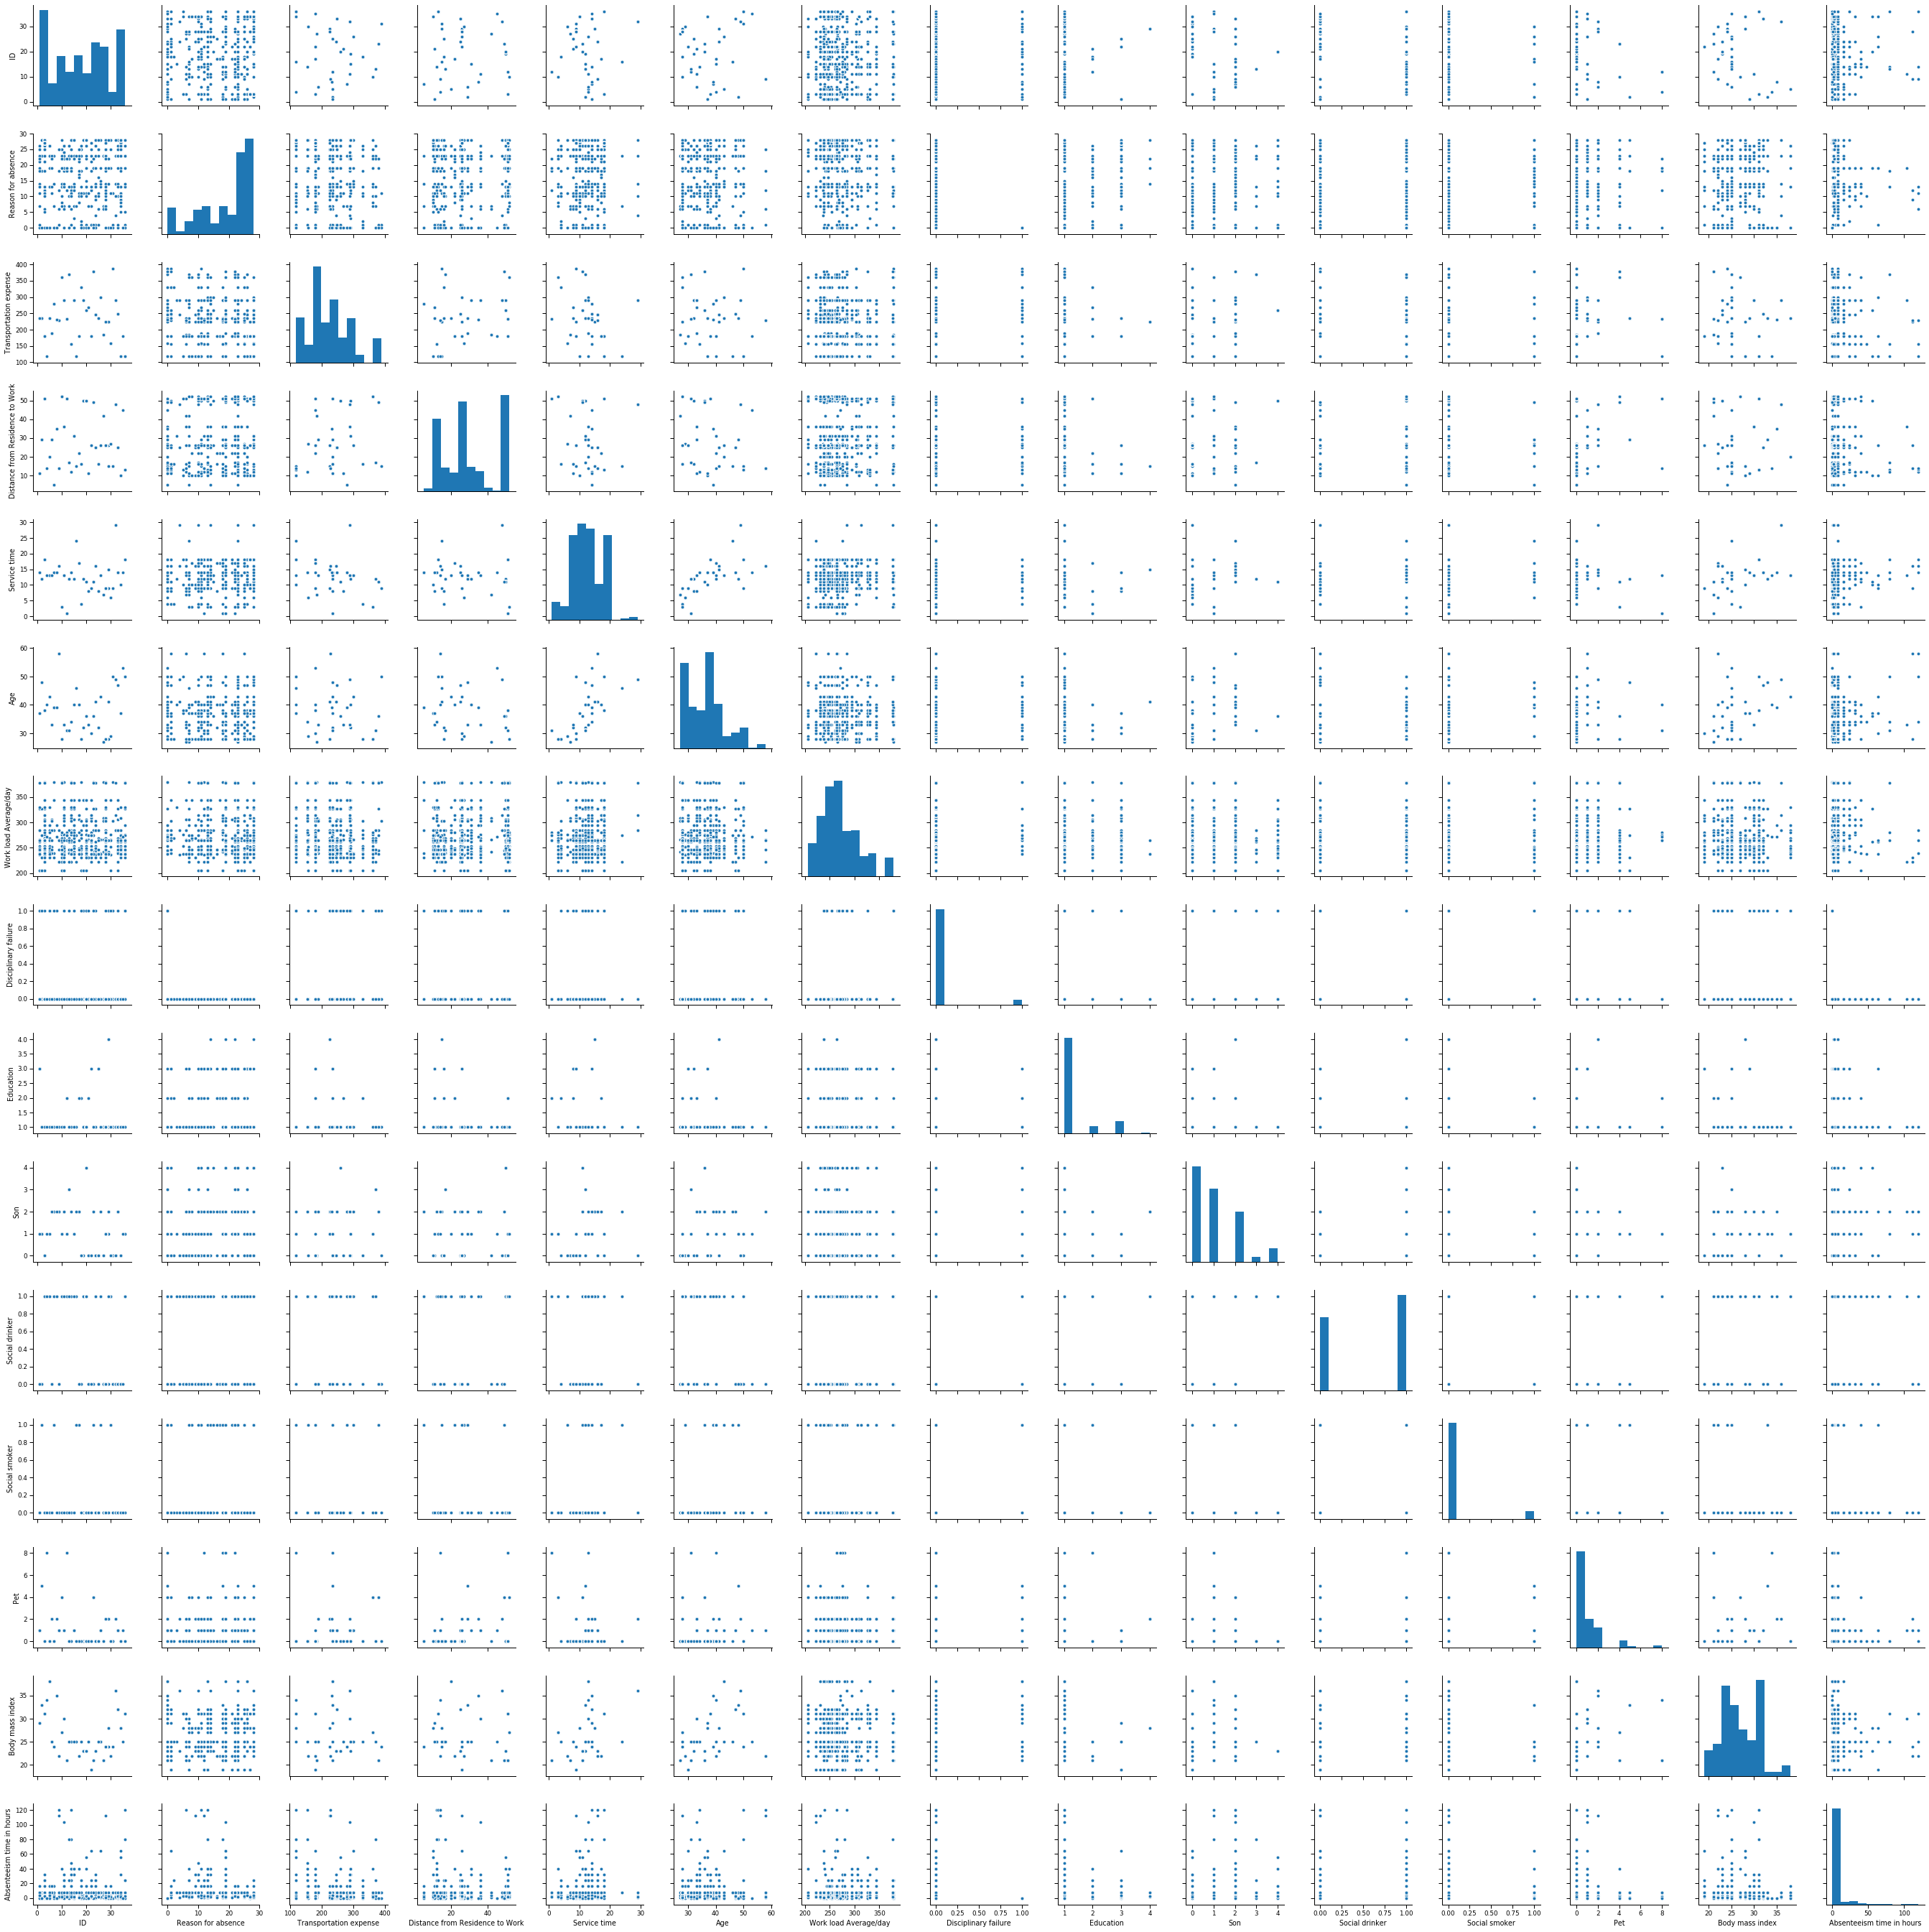

In [40]:
sns.pairplot(Ab_data)

# Using the data we have to create Categories


In [16]:
Ab_data['Age Category'] = ['young employee' if 25<=age<=35 else 'mid age employee' if 36<=age<=45 else 'old employee' if age>=45 else None\
                      for age in list(Ab_data['Age'].values)  ] 
Ab_data['smoke_cat'] = ['no' if period<=0 else 'yes' if period >=1 else None \
                               for period in list (Ab_data['Social smoker'].values)]
Ab_data['absenteeism category'] = ['late' if period<=0 else 'very late' if 0<=period<=10 else 'extremely late' if period>=10 else None \
                               for period in list (Ab_data["Absenteeism time in hours"].values)]
Ab_data['Disciplinary cat'] = ['not taken' if period<=0 else 'taken' if period >=1 else None \
                               for period in list (Ab_data['Disciplinary failure'].values)]
Ab_data['drink_cat'] = ['no' if period<=0 else 'yes' if period >=1 else None \
                               for period in list (Ab_data['Social drinker'].values)]
Ab_data['Education_cat'] = ['high school' if  period ==1 else 'grudate' if  period ==2 else "postgraduate" if  period ==3 else 'doctor' if  period ==4 else  None \
                               for period in list (Ab_data['Education'].values)]
Ab_data['transportation category '] = ['cheap' if 100<=tfare<=200 else 'expensive' if 200<=tfare<=300 else 'very expensive' if tfare>300 else None \
                                   for tfare in list(Ab_data["Transportation expense"].values)]
Ab_data['distace category'] = ['close' if 0<=tfare<=15 else 'far' if 15<=tfare<=35 else 'very far' if tfare>35 else None \
                                   for tfare in list(Ab_data["Distance from Residence to Work"].values)]

In [17]:
Ab_data.head()

,ID,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,...,Body mass index,Absenteeism time in hours,Age Category,smoke_cat,absenteeism category,Disciplinary cat,drink_cat,Education_cat,transportation category,distace category
0,11,26,289,36,13,33,239.554,0,1,2,...,30,4,young employee,no,very late,not taken,yes,high school,expensive,very far
1,36,0,118,13,18,50,239.554,1,1,1,...,31,0,old employee,no,late,taken,yes,high school,cheap,close
2,3,23,179,51,18,38,239.554,0,1,0,...,31,2,mid age employee,no,very late,not taken,yes,high school,cheap,very far
3,7,7,279,5,14,39,239.554,0,1,2,...,24,4,mid age employee,yes,very late,not taken,yes,high school,expensive,close
4,11,23,289,36,13,33,239.554,0,1,2,...,30,2,young employee,no,very late,not taken,yes,high school,expensive,very far


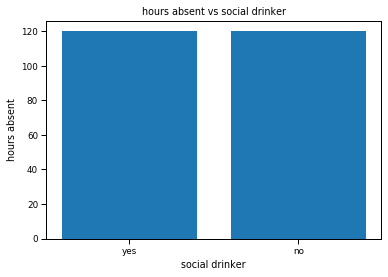

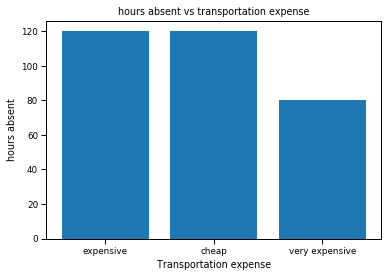

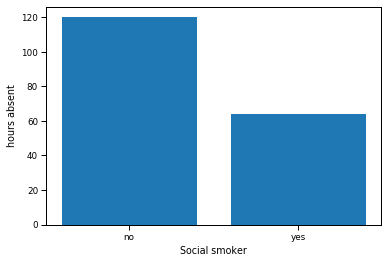

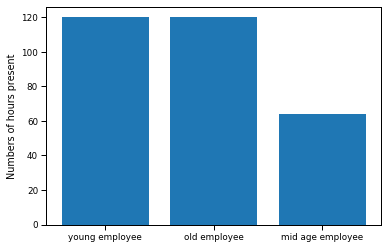

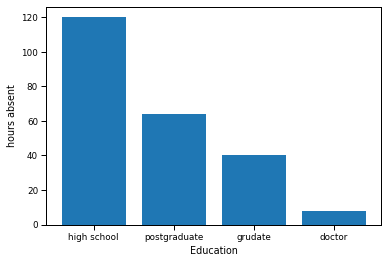

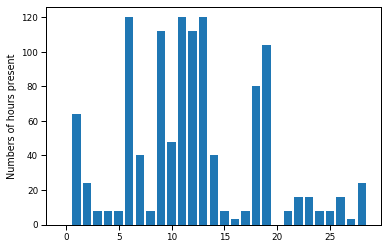

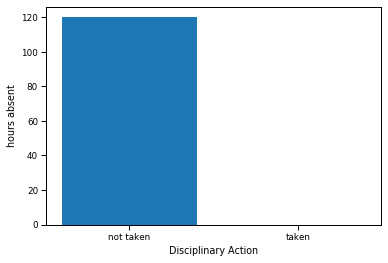

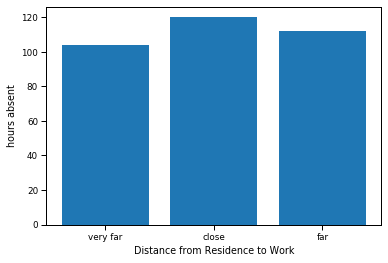

In [18]:
plt.bar(Ab_data['drink_cat'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('social drinker')
plt.ylabel("hours absent")
plt.title('hours absent vs social drinker')
plt.show()
plt.bar(Ab_data['transportation category '], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Transportation expense')
plt.ylabel("hours absent")
plt.title("hours absent vs transportation expense")
plt.show()
plt.bar(Ab_data['smoke_cat'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Social smoker')
plt.ylabel("hours absent")
plt.show()
plt.bar(Ab_data['Age Category'], Ab_data['Absenteeism time in hours'])
plt.ylabel("Numbers of hours present")
plt.show()
plt.bar(Ab_data['Education_cat'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Education')
plt.ylabel("hours absent")
plt.show()
plt.bar(Ab_data['Reason for absence'], Ab_data['Absenteeism time in hours'])
plt.ylabel("Numbers of hours present")
plt.show()
plt.bar(Ab_data['Disciplinary cat'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Disciplinary Action')
plt.ylabel("hours absent")
plt.show()
plt.bar(Ab_data['distace category'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Distance from Residence to Work')
plt.ylabel("hours absent")
plt.show()

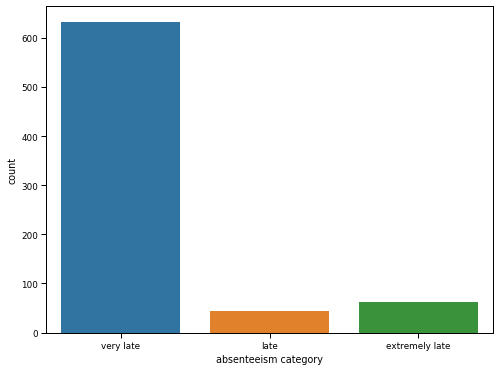

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='absenteeism category',data=Ab_data)

In [45]:
#Ab_data = Ab_data.drop([ 'ID','Age Category', 'Education_cat', 'transportation category ','Disciplinary cat','drink_cat','smoke_cat','Absenteeism time in hours'],axis=1,inplace=True)

In [59]:
type(Ab_data)

pandas.core.frame.DataFrame

In [20]:
Ab_data.head()

,ID,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,...,Body mass index,Absenteeism time in hours,Age Category,smoke_cat,absenteeism category,Disciplinary cat,drink_cat,Education_cat,transportation category,distace category
0,11,26,289,36,13,33,239.554,0,1,2,...,30,4,young employee,no,very late,not taken,yes,high school,expensive,very far
1,36,0,118,13,18,50,239.554,1,1,1,...,31,0,old employee,no,late,taken,yes,high school,cheap,close
2,3,23,179,51,18,38,239.554,0,1,0,...,31,2,mid age employee,no,very late,not taken,yes,high school,cheap,very far
3,7,7,279,5,14,39,239.554,0,1,2,...,24,4,mid age employee,yes,very late,not taken,yes,high school,expensive,close
4,11,23,289,36,13,33,239.554,0,1,2,...,30,2,young employee,no,very late,not taken,yes,high school,expensive,very far


# TRAIN TEST SPLIT

In [21]:
# split data into features and target

X = Ab_data[['Reason for absence', 'Social smoker', 'Pet','Distance from Residence to Work', 'Age', 'Social drinker','Body mass index', 'Education','Son' ]]
y=Ab_data['absenteeism category']

#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split (X,y,test_size=0.3,random_state=101)

The countplot shows us that the data are very imbalanced.  This means that if we fit the model based on this data then we would be training it to, basically, just pick 1 category and it will be correct a high percentage of the time.  SMOTE will take the minority class and will Over Sample synthetically in order to create a balance.

In [22]:
X_train.shape,y_train.shape #checking the shape of our training set

((518, 9), (518,))

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=7)
X_sm,y_sm = smote.fit_sample(X_train,y_train)

In [24]:
X_sm.shape,y_sm.shape  #checking the shape after oversampling

((926, 9), (926,))

# NAIVE BAYES

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_sm, y_sm)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

extremely late       0.31      0.24      0.27        21
          late       0.38      0.80      0.52        10
     very late       0.92      0.89      0.90       191

      accuracy                           0.82       222
     macro avg       0.54      0.64      0.56       222
  weighted avg       0.84      0.82      0.83       222



In [28]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

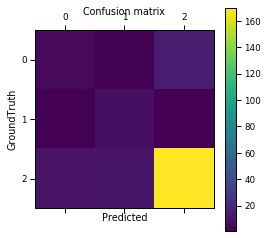

[[  5   2  14]
 [  1   8   1]
 [ 10  11 170]]


In [29]:
conftable(y_test,y_pred,"conf")

In [30]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8243243243243243


# LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression(random_state = 0)

In [37]:
logmodel.fit(X_sm,y_sm)

C:\Users\rclauss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rclauss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

extremely late       0.00      0.00      0.00        21
          late       0.34      1.00      0.51        10
     very late       0.91      0.92      0.91       191

      accuracy                           0.83       222
     macro avg       0.42      0.64      0.47       222
  weighted avg       0.80      0.83      0.81       222



C:\Users\rclauss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test,predictions)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

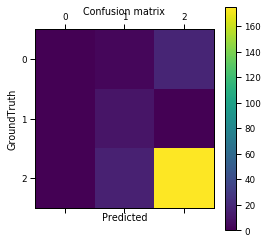

[[  0   3  18]
 [  0  10   0]
 [  0  16 175]]


In [42]:
conftable(y_test,predictions,"conf")

In [43]:
print("Accuracy: ", metrics.accuracy_score(y_test,predictions))

Accuracy:  0.8333333333333334


# USING SUPPORT VECTOR MACHINE

In [44]:
from sklearn.svm import SVC

In [45]:
svc = SVC()

In [46]:
svc.fit(X_sm,y_sm)

C:\Users\rclauss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
pred = svc.predict(X_test)

In [48]:
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

extremely late       0.50      0.10      0.16        21
          late       0.44      0.40      0.42        10
     very late       0.89      0.97      0.92       191

      accuracy                           0.86       222
     macro avg       0.61      0.49      0.50       222
  weighted avg       0.83      0.86      0.83       222



In [49]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test,pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

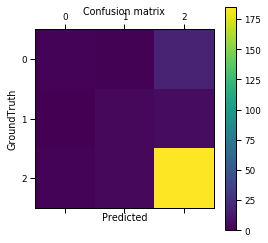

[[  2   1  18]
 [  0   4   6]
 [  2   4 185]]


In [50]:
conftable(y_test,pred,"conf")

In [51]:
print("Accuracy: ", metrics.accuracy_score(y_test,pred))

Accuracy:  0.8603603603603603


# RANDOM FOREST CLASSIFIER

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(n_estimators=1000,criterion = 'entropy')

In [54]:
rfc.fit(X_sm,y_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
pred_ = rfc.predict(X_test)

In [60]:
print(classification_report(y_test,pred_))

                precision    recall  f1-score   support

extremely late       0.43      0.29      0.34        21
          late       1.00      1.00      1.00        10
     very late       0.92      0.96      0.94       191

      accuracy                           0.90       222
     macro avg       0.78      0.75      0.76       222
  weighted avg       0.88      0.90      0.89       222



In [61]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test,pred_)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

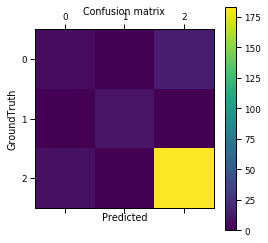

[[  6   0  15]
 [  0  10   0]
 [  8   0 183]]


In [62]:
conftable(y_test,pred_,"conf")

In [63]:
print("Accuracy: ", metrics.accuracy_score(y_test,pred_))

Accuracy:  0.8963963963963963


# The great thing about scikit-learn is how similar all of the algos are.  There is no reason not to test as many as you can simply because it is so easy to use and once you have written the graphing code once you can just re-use it.